In [1]:
#: the usual imports
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
plt.style.use('fivethirtyeight')

# Lecture 19

### Experiment Design and Correlation

# Experiment Design

## Example: Polling

- You are conducting a campus poll:
    - Yes/No: Does Eleanor Roosevelt College exist?
- You want to estimate the proportion in population who believe "Yes".
- Need to be accurate to within $\pm$ 3%, 95% of the time.
- i.e., your 95% confidence interval should be 6% wide.
- How big of a sample do you need?

## Proportions are just means

- When polling, we'll write 1 if a person answers "Yes", 0 otherwise.
- The sample proportion in favor of A = mean of 0's and 1's
- I.e., it is the mean of random sample.
- Hence the CLT applies.

## Our strategy

1. We will poll a random sample of $n$ people
2. Compute sample mean (i.e., proportion in favor of A)
3. Compute sample standard deviation
4. Construct 95% confidence interval:
$$
\left[
\text{sample mean} - 2\cdot \frac{\text{sample SD}}{\sqrt{n}},
\text{sample mean} + 2\cdot \frac{\text{sample SD}}{\sqrt{n}}
\right]
$$

## Our strategy

- We want a CI whose width is 4% or less.
- The width of our confidence interval depends on two things:
    - sample SD
    - $\sqrt{n}$
- If we know SD, we can pick $n$ to make CI the right size.
- But before polling, we don't know the sample SD (we don't have a sample!)

## Bounding the sample SD

- How big could the sample SD be?
- This is a simple calculation, but...
- Let's try to get the answer from a plot.

## Create a population

In [2]:
#: construct an array of zeros/ones
def polling_population(size, number_of_ones):
    count = np.arange(size)
    return np.where(count < number_of_ones, 1, 0)

In [3]:
polling_population(10, 3)

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

## Compute standard deviations

In [4]:
#: compute SD for each proportion
size = 100
proportions = np.arange(0, size+1, 10)
sds = make_array()

for proportion in proportions:
    population = polling_population(size, proportion)
    sd = np.std(population)
    sds = np.append(sds, sd)

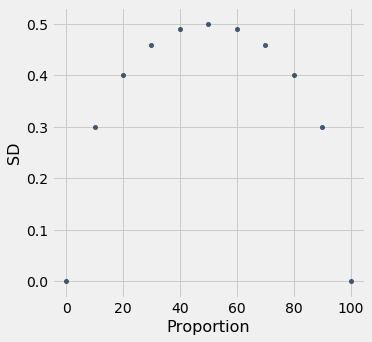

In [5]:
Table().with_columns(
    'Proportion', proportions,
    'SD', sds
).scatter('Proportion')

## Bounding the sample SD

- The most the sample SD can be is 0.5.
- Doesn't depend on size of sample.
- True for the population, too!
- Using 0.5 in place of SD results in a conservative confidence interval.

## Constructing the 95% confidence interval

- The interval is:

$$
\left[
\text{sample mean} - 2\cdot \frac{\text{sample SD}}{\sqrt{n}},
\text{sample mean} + 2\cdot \frac{\text{sample SD}}{\sqrt{n}}
\right]
$$

- The width is:

$$
4 \cdot \frac{\text{sample SD}}{\sqrt{n}}
$$

- Use 0.5 instead of sample SD:

$$
4 \cdot \frac{0.5}{\sqrt{n}} = \frac{2}{\sqrt{n}}
$$

## Constructing the 95% confidence interval

- Upper bound on CI width: $2 / \sqrt{n}$
- Want our sample mean to be within $\pm$ 3%.
- I.e., want our CI to be smaller than 6% = .06.
- Solve for $n$:

$$
\sqrt{n} = \frac{2}{0.06}
$$

In [6]:
(2/.06)**2

1111.1111111111113

## Answer

- We must poll $\approx$ 1111 people to get a 95% CI which is 6% wide.

## Discussion question

We must poll 1111 people to get a 95% CI which is 6% wide.
Suppose we instead want a CI that is 3% wide. How many people do we need to poll?

- A) 555
- B) 2222
- C) 4444
- D) 8888

## Answer: the $\sqrt{\quad}$ rule

- We need 4444 samples.
- To double our accuracy, we must *quadruple* our sample size.

## Experiment

- Let's see how accurate this is.
- Code below chooses some true proportion in favor of A. Don't peek!

In [11]:
#: don't peek
population_proportion = np.random.choice(np.arange(.3, .7, .01))
population_proportion = 0.3

## Conduct a poll

In [12]:
#:
poll_results = sample_proportions(1111, [population_proportion, 1-population_proportion])
poll_results

array([0.29252925, 0.70747075])

## Repeat the poll

In [13]:
#: simulate 5000 polls
distribution = make_array()

for i in np.arange(5000):
    poll_results = sample_proportions(1111, [population_proportion, 1-population_proportion])
    distribution = np.append(distribution, poll_results.item(0))

## Visualize

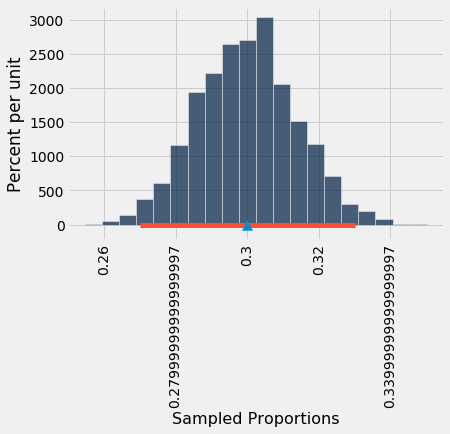

In [14]:
#: draw histogram
Table().with_column('Sampled Proportions', distribution).hist(bins=20)

plt.scatter(population_proportion, 0, marker='^', zorder=3, s=100)
plt.plot([population_proportion - .03, population_proportion + .03], [0, 0], color='C1', linewidth=5)

In [15]:
np.count_nonzero((population_proportion - .03 <= distribution) & (distribution <= population_proportion + .03)) / 5000

0.972

In [16]:
population_proportion

0.3

# Correlation 

## Relations between two variables
* Association
* Trend
    - Positive association
    - Negative association
* Pattern
    - Any discernible "shape"
    - Linear
    - Non-Linear

## Variable relationships: hybrid cars

In [17]:
#:
hybrid = Table.read_table('hybrid.csv')
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


### Acceleration and price
* Is there an association?
* What kind of association?

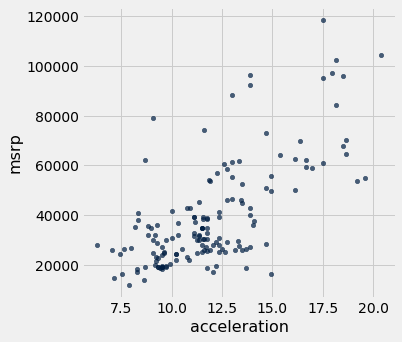

In [18]:
hybrid.scatter('acceleration', 'msrp')

### Discussion Question

This scatter plot shows that people are generally:

|Option|Answer|
|---|---|
|A.|Willing to pay more for cars that accelerate faster|
|B.|Willing to pay more for certain cars because they accelerate faster|
|C.|Not willing to pay more for cars that accelerate faster|
|D.|More than one of the above|

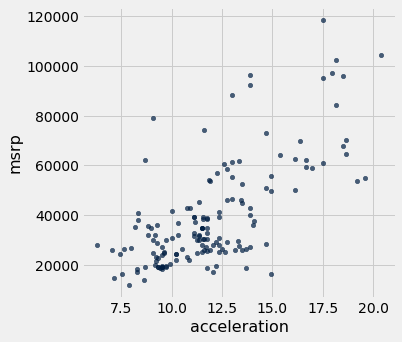

In [19]:
#:
hybrid.scatter('acceleration', 'msrp')

### Fuel economy and price

* Is there an association?
* What kind of association?

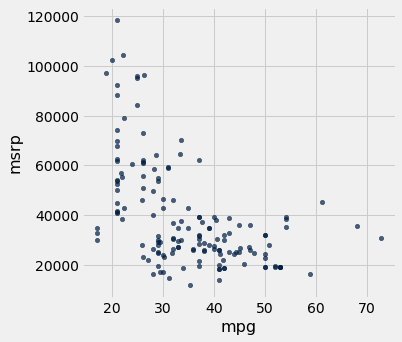

In [20]:
hybrid.scatter('mpg', 'msrp')

### Observations
* There is an association:
    - Are people more willing to pay less for certain cars because they want poor fuel economy?
* The association looks more curved than linear, like $~\frac{1}{x}$

### Understanding units 
* A linear change in units doesn't change the shape of the plot.
* The scale *does* change with the units.

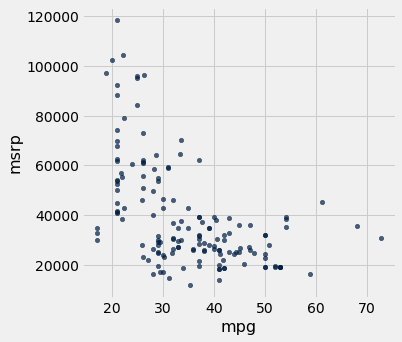

In [21]:
hybrid.scatter('mpg', 'msrp')

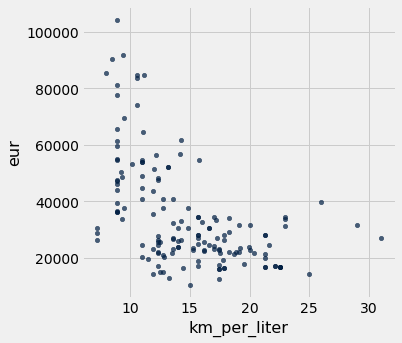

In [22]:
hybrid.with_columns(
        'km_per_liter', hybrid.column('mpg') * 0.425144,
        'eur', hybrid.column('msrp') * 0.88 
).scatter('km_per_liter', 'eur')

### Converting columns to standard units
* makes different scatterplots comparable
* allows x and y axis to be "similarly scaled"
    - both axes measure standard deviations from their means
* doesn't change shape of the scatterplot (conversion is linear)

In [23]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)

In [24]:
def standardize(t):
    """Return a table in which all columns of t are converted to standard units."""
    t_su = Table()
    for label in t.labels:
        t_su = t_su.with_column(label + ' (su)', standard_units(t.column(label)))
    return t_su

### Standard units: hybrid cars
* For a given pair of variables:
    - which cars are average from both perspectives?
    - which cars are both well above/below average?

In [25]:
hybrid_su = standardize(hybrid.select('msrp', 'acceleration','mpg'))
hybrid_su

msrp (su),acceleration (su),mpg (su)
-0.69363,-1.53501,0.59091
-0.18568,-1.2825,1.76495
-0.584852,-1.36098,0.953911
-0.954663,-0.832081,1.66437
-0.631636,-1.67832,1.11941
-0.949966,-0.832081,1.66437
-0.945268,-0.767248,1.66437
-0.057827,-1.23814,0.517761
-0.945268,-0.832081,1.66437
-1.1825,-1.13919,0.567137


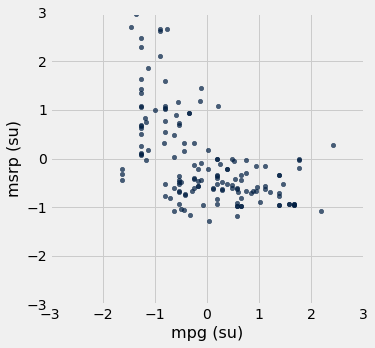

In [26]:
hybrid_su.scatter('mpg (su)', 'msrp (su)')
plt.xlim(-3, 3)
plt.ylim(-3, 3);

In [27]:
(
    hybrid_su
    .with_column('vehicle', hybrid.column('vehicle'))
    .where('mpg (su)', are.between(-0.2, 0.2))
    .where('msrp (su)', are.between(-0.2, 0.2))
)

msrp (su),acceleration (su),mpg (su),vehicle
-0.0847068,0.723914,-0.105833,Audi Q5
0.168841,-0.402135,0.0185203,Chevrolet Volt


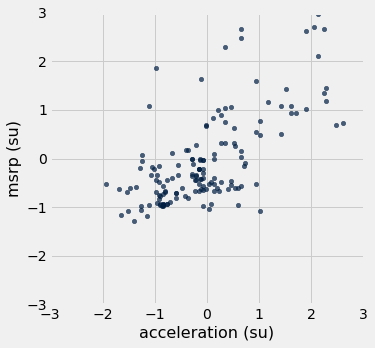

In [28]:
hybrid_su.scatter('acceleration (su)', 'msrp (su)')
plt.xlim(-3, 3)
plt.ylim(-3, 3);

In [ ]:
(
    hybrid_su
    .with_column('vehicle', hybrid.column('vehicle'))
    .where('acceleration (su)', are.above(2))
    .where('msrp (su)', are.above(2))
)

### Observation on associations in standard units
* If two attributes are positively associated,
    - their high, positive values in standard units are typically seen together,
    - their low, negative values are seen together as well.
* If two attributes are negatively associated,
    - high, positive values of one are typically coupled with low, negative values of the other.
* If two attributes aren't associated, there shouldn't be pattern in their relative sizes.

## Definition: Correlation Coefficient

**Definition**: The correlation coefficient $r$ of two attributes $x$ and $y$ is the average value of the product of $x$ and $y$ when measured in standard units.

* If `x` and `y` are arrays (i.e. columns in a table): 
```
r = np.mean(x_su * y_su)
```
where `x_su` and `y_su` are `x` and `y` converted to standard units.


### Calculate the $r$ for `acceleration` and `msrp`

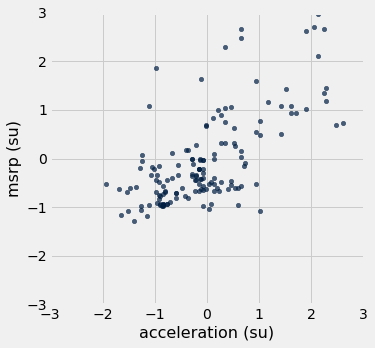

In [29]:
hybrid_su.scatter('acceleration (su)', 'msrp (su)')
plt.xlim(-3, 3)
plt.ylim(-3, 3);

In [30]:
#:
(
    hybrid_su
    .select('acceleration (su)', 'msrp (su)')
    .with_column('product of su', hybrid_su.column('acceleration (su)') * hybrid_su.column('msrp (su)'))
)

acceleration (su),msrp (su),product of su
-1.53501,-0.69363,1.06473
-1.2825,-0.18568,0.238135
-1.36098,-0.584852,0.795974
-0.832081,-0.954663,0.794357
-1.67832,-0.631636,1.06009
-0.832081,-0.949966,0.790448
-0.767248,-0.945268,0.725255
-1.23814,-0.057827,0.071598
-0.832081,-0.945268,0.78654
-1.13919,-1.1825,1.34708


In [31]:
#:
r = np.mean(hybrid_su.column('acceleration (su)') * hybrid_su.column('msrp (su)'))
r

0.6955778996913978

## The Correlation Coefficient $r$

* Measures how clustered points are around a straight line (linear association)
* Based on standard units
* $-1 \leq r \leq 1$
    - $r = 1$: scatterplot is a line of slope 1.
    - $r = -1$: scatterplot is a line of slope -1.
* $r = 0$: no linear association; *uncorrelated*.

### Calculate the $r$ for `mpg` and `msrp`

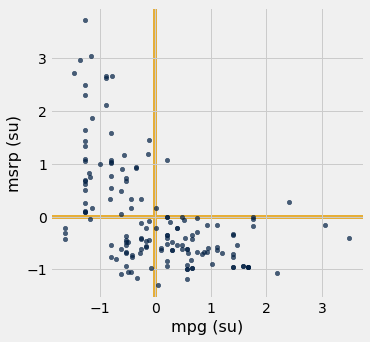

In [32]:
hybrid_su.scatter('mpg (su)', 'msrp (su)')
plt.axhline(color='C2', zorder=0)
plt.axvline(color='C2', zorder=0)

In [33]:
#:
(
    hybrid_su
    .select('mpg (su)', 'msrp (su)')
    .with_column('product of su', hybrid_su.column('mpg (su)') * hybrid_su.column('msrp (su)'))
)

mpg (su),msrp (su),product of su
0.59091,-0.69363,-0.409873
1.76495,-0.18568,-0.327716
0.953911,-0.584852,-0.557897
1.66437,-0.954663,-1.58891
1.11941,-0.631636,-0.707059
1.66437,-0.949966,-1.58109
1.66437,-0.945268,-1.57327
0.517761,-0.057827,-0.0299406
1.66437,-0.945268,-1.57327
0.567137,-1.1825,-0.670638


In [34]:
#:
r = np.mean(hybrid_su.column('mpg (su)') * hybrid_su.column('msrp (su)'))
r

-0.5318263633683786

## Scatterplots with given correlation coefficients

In [35]:
#:
def r_scatter(r):
    plt.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plt.scatter(x, y)
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.suptitle('r = %f' %r, fontsize=14)

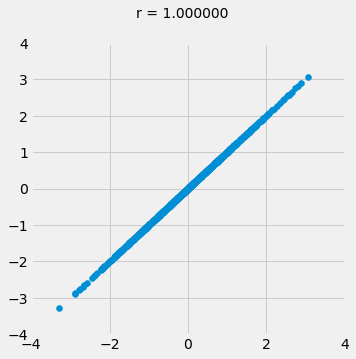

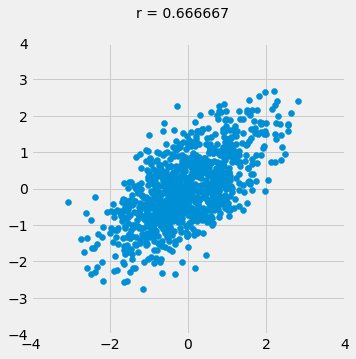

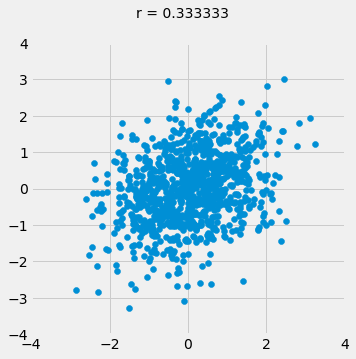

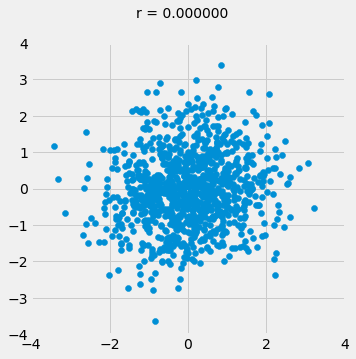

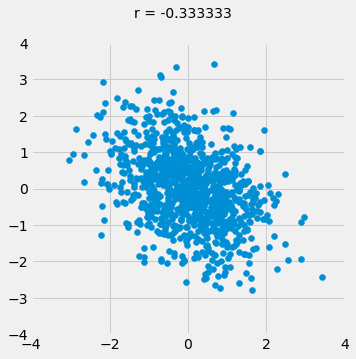

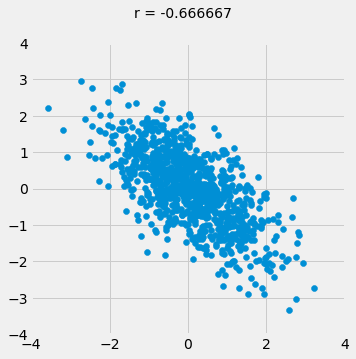

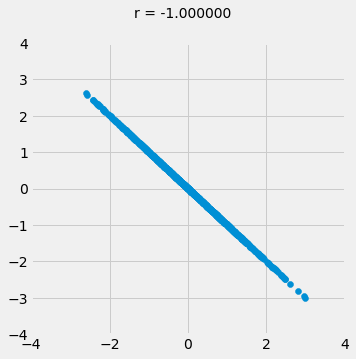

In [36]:
#:
for r in np.linspace(1, -1, 7):
    r_scatter(r)

### Discussion Question
Does the following scatter plot show:

- A. Association and correlation
- B. Association but not correlation
- C. Correlation but not association
- D. Neither association nor correlation

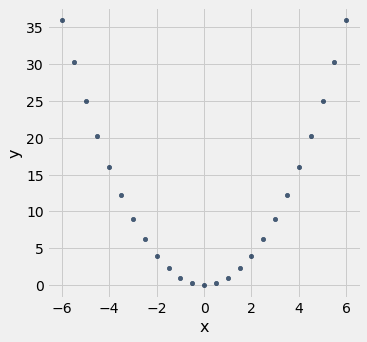

In [37]:
x2 = Table().with_columns(
    'x', np.arange(-6, 6.1, 0.5), 
    'y', np.arange(-6, 6.1, 0.5)**2)
x2.scatter('x', 'y')

### Answer

In [38]:
products = standard_units(x2.column('x')) * standard_units(x2.column('y'))
products

array([-3.2996324 , -2.26849727, -1.43462278, -0.78007614, -0.28692456,
        0.06276475,  0.28692456,  0.40348766,  0.43038683,  0.38555487,
        0.28692456,  0.15242867, -0.        , -0.15242867, -0.28692456,
       -0.38555487, -0.43038683, -0.40348766, -0.28692456, -0.06276475,
        0.28692456,  0.78007614,  1.43462278,  2.26849727,  3.2996324 ])

In [39]:
np.mean(products)

0.0

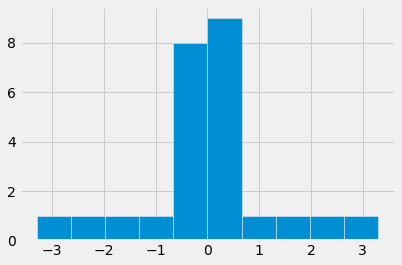

In [40]:
plt.hist(products);

## Effects of outliers

In [41]:
def correlation(t, label_x, label_y):
    x_in_standard_units = standard_units(t.column(label_x))
    y_in_standard_units = standard_units(t.column(label_y))
    return np.mean(x_in_standard_units * y_in_standard_units)

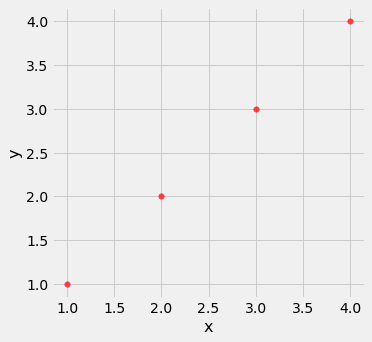

In [42]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=30, color='r')

In [43]:
correlation(line, 'x', 'y')

1.0

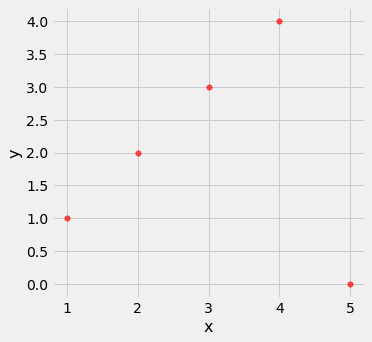

In [44]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')

In [45]:
correlation(outlier, 'x', 'y')

0.0

# Examples

### Hybrids

In [ ]:
hybrid.scatter('mpg', 'msrp')

In [ ]:
correlation(hybrid, 'mpg', 'msrp')

In [ ]:
hybrid.scatter('acceleration', 'msrp')

In [ ]:
correlation(hybrid, 'acceleration', 'msrp')

### Ecological Correlations

Careful!  correlation of populations does not reflect the strength of the relationship for individuals.

In [ ]:
sat2014 = Table.read_table('sat2014.csv').sort('State')
sat2014

In [ ]:
sat2014.scatter('Critical Reading', 'Math')

In [ ]:
correlation(sat2014, 'Critical Reading', 'Math')